# DATA 601-L01 – Group 2 – Final Report
Alvin Hui Tsz Chuen, Arshdeep Kaur, David Errington, Judy Kurupakorn Natcha

October 17, 2024

When deciding on where to live, whether you are new to the city or just looking for a new place to call home, it is always worth it to get a sense of the surrounding area. Depending on who you ask, the list of criteria one might have in making this decision may vary from person-to-person. But for many, this list may include aspects such as proximity to one's place of work or school, ease of access to certain amenities (i.e., parks, social/recreational activities, health services, grocery/retail stores, etc.), or the overall safety and security of the area. 

For our project, we chose to focus on this third aspect and specifically look at the safety of Calgary's communities by analyzing their crime rates. As many of our classmates are new to the city of Calgary, we felt this topic was very interesting and relevant to all of us who call this place home. In testing our statistical knowledge and applying some of the concepts we learned throughout our studies in DATA 601, we hope this project will shed some light on the subject of Calgary crime rates and provide valuable insights in making better informed decisions.

# Guiding Questions

While exploring the various aspects of our datasets, the first and most obvious question for us to consider is, “How has the overall crime rate in Calgary changed over time?” From there, this can be broken down further into other questions regarding things such as seasonality. That is, whether or not certain months of the year see higher or lower rates of crime as compared to others.

This leads us to the next logical question in our analysis: the correlation between crime rates and unemployment rates over time. Understanding how these two factors interact can provide valuable insights into the broader social context surrounding crime in Calgary.

Following this, we will discuss the effect of the COVID-19 pandemic. Although it is unclear exactly when the global pandemic began, most sources agree that the first cases of the virus appeared in humans in late 2019. By 2020, the SARS-CoV-2 coronavirus was declared a “Public Health Emergency of International Concern” by the World Health Organization (WHO) and was continuing to spread across the globe. While many countries have now since removed any mandatory health restrictions, the effects of the pandemic still remain and creates a clear delineation between the “pre” and “post” eras.

Turning our attention back to Calgary, the final two or three questions stem from Calgary’s communities themselves and the types of crimes that occur within each of them. Specifically, whether certain areas are more at risk than others, whether there are certain types of crimes that occur more or less frequently, and whether or not there might be a correlation between the two. All of these questions are relevant, as they may help to present people with the resources and information to make informed decisions about where they might choose to live.

In summary, our project aims to analyze the following questions and more details on each question can be found in the Analysis section.

**1) How has the overall crime rate in Calgary changed over time?**

**2) How does seasonality affect crime rates?**

**3) How does the crime rate correlate with unemployment rates over time?**

**4) How did the Covid-19 pandemic affect crime rates?**

**5) How are crime rates and crime types distributed across communities?**

# Datasets

In this project, our analysis will utilize three datasets, all of which are publicly available from the City of Calgary's Open Data Portal:

  - Community Crime Dataset,
  - Community Boundaries Dataset, and
  - Unemployment Rates Dataset.

The Community Crime Dataset provided by the Calgary Police Service will be our main dataset. The dataset offers a detailed monthly breakdown of various types of crimes across Calgary’s diverse communities, covering the period from January 2018 to June 2024. It has five columns and over 71,000 rows as of the time of writing this proposal. In total, the dataset covers the crime statistics of 247 communities in Calgary. Each entry in the dataset provides in-depth crime information, including the specific community, crime category, crime count, and the date (year and month) the incident occurred.

The second dataset is the Community Boundaries Dataset, which will allow us to perform crime analysis at the community level. The dataset has 10 columns and 296 rows, containing not only mapping information for communities and quadrants but also the multipolygon records for each community. Such information enables us to perform crime analysis at a fine-grained level.

The last dataset is the Unemployment Rates Dataset. The dataset contains 11 columns and 56 rows, including various economic-related figures, but for our analysis, we will mainly use the Calgary Unemployment Rate column. This information will allow us to investigate the relationship between the unemployment rate and the overall crime rate.

These datasets are well-formed and available through the City of Calgary's Open Data Portal in multiple formats (including CSV, RDF, RSS, TSV, and XML).  With additional data cleaning and wrangling, these datasets will enable us to perform an in-depth analysis of crime patterns at both the city and community levels, analyze the relationship between crime rates and unemployment rates, as well as conduct trend analysis over a significant time period.

Lastly, according to the terms of the Open Government License for the City of Calgary, anyone is free to “copy, modify, publish, translate, adapt, distribute, or otherwise use the information in any medium, mode, or format for any lawful purpose” (Open Calgary Terms of Use, 2024).

# Data Cleaning

In [1]:
# Import necessary modules
from shapely import wkt
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import seaborn as sns

### Data Cleaning on the Community Crime Dataset

Three datasets from the City of Calgary's Open Data Portal are well-structured, requiring only minimal data cleaning. In summary, the following actions were performed:

- Checked and removed empty rows (if any)
- Ensured the correct data types for columns
- Standardized column names
- Rectified specific character issues in the dataset (i.e., changed 'Violence\xa0 Other' (Non-domestic) to 'Violence Other' (Non-domestic))"



In [2]:
### Data cleaning - Community Crime Dataset

# Load the dataset
df_crime_data = pd.read_csv('Dataset_Community_Crime_Statistics.csv', encoding='utf-8')

# Handle missing values
# print("Missing values before cleaning:")
# print(df_crime_data.isnull().sum())
df_crime_data = df_crime_data.dropna()
# print("Missing values after cleaning:")
# print(df_crime_data.isnull().sum())
# print()

# Standardize column names
df_crime_data.columns = df_crime_data.columns.str.lower().str.replace(' ', '_')

# Standardize data in the category column
df_crime_data['category'] = df_crime_data['category'].replace({
    'Break & Enter - Commercial': 'Break & Enter - Commercial',
    'Break & Enter - Dwelling': 'Break & Enter - Dwelling',
    'Theft FROM Vehicle': 'Theft from Vehicle',
    'Theft OF Vehicle': 'Theft of Vehicle',
    "Violence\xa0 'Other' (Non-domestic)": "Violence Other (Non-domestic)"
})

# View unique category
# print("Unique values in 'category' after cleaning:")
# print(df_crime_data['category'].unique())
# print()

# Count unique community
# print(f"Number of unique communities: {df_crime_data['community'].nunique()}")
# print()

# Create a datetime column from the year and month column
df_crime_data['date'] = pd.to_datetime(df_crime_data['year'].astype(str) + '-' + df_crime_data['month'].astype(str).str.zfill(2) + '-01')

# Ensure correct data types
df_crime_data['crime_count'] = df_crime_data['crime_count'].astype(int)
df_crime_data['year'] = df_crime_data['year'].astype(int)
df_crime_data['month'] = df_crime_data['month'].astype(int)
# print("Data types after conversion:")
# print(df_crime_data.dtypes)
# print()

# print(df_crime_data.head(3))


### Data Cleaning - Community District Boundaries Dataset
df_community_districts = pd.read_csv('Dataset_Community_District_Boundaries.csv')
# print(df_community_districts.head(3))
# print()

# Handle missing values
columns_to_clean = ['CLASS', 'NAME', 'SECTOR', 'MULTIPOLYGON']
# print("Missing values before cleaning:")
# print(df_community_districts[columns_to_clean].isnull().sum())

# Standardize column names
df_community_districts.columns = df_community_districts.columns.str.replace(' ', '_')
# print(df_community_districts.columns)
# print()

# Identify rows with missing values
rows_with_missing = df_community_districts[df_community_districts[columns_to_clean].isnull().any(axis=1)]
# if not rows_with_missing.empty:
#     print("COMM_CODEs of rows dropped due to missing values:")
#     print(rows_with_missing['COMM_CODE'].tolist())
#     print()

# Drop rows with missing values in specified columns
df_community_districts = df_community_districts.dropna(subset=columns_to_clean)

# print("Missing values after cleaning:")
# print(df_community_districts[columns_to_clean].isnull().sum())
# print()

# Ensure correct datatype
df_community_districts['CLASS_CODE'] = pd.to_numeric(df_community_districts['CLASS_CODE'], errors='coerce').astype('Int64')
df_community_districts['CREATED_DT'] = pd.to_datetime(df_community_districts['CREATED_DT'])
df_community_districts['MODIFIED_DT'] = pd.to_datetime(df_community_districts['MODIFIED_DT'])
# print(df_community_districts.head(3))


### Data Cleaning - Unemployment Rates Dataset

# Load the dataset
df_unemployment_data = pd.read_csv('Dataset_Economic_Indicators.csv', encoding='utf-8')

# Standardize column names
df_unemployment_data.columns = df_unemployment_data.columns.str.lower().str.replace(' ', '_')

# Drop the unused columns
df_unemployment_data = df_unemployment_data.drop(columns=['calgary_(cma)_average_hourly_wage_rate_($)',
       'city_of_calgary_building_permits_residential_value_($)',
       'city_of_calgary_building_permits_non-residential_value_($)',
       'calgary_(city)_total_housing_starts_(units)',
       'calgary_(cma)_total_housing_starts_(units)',
       'calgary_(cer)_retail_sales_($billions)',
       'calgary_(cma)_inflation_rate_(%change)'])


# Split the 'date' column into 'year' and 'month'
df_unemployment_data[['year', 'month']] = df_unemployment_data['date'].str.split('-', expand=True)

# Convert the new columns to int
df_unemployment_data['year'] = df_unemployment_data['year'].astype(int)
df_unemployment_data['month'] = df_unemployment_data['month'].astype(int)

# print("Data types after conversion:")
# print(df_unemployment_data.dtypes)

**Community Crime Dataset**

In [3]:
df_crime_data.head()

,community,category,crime_count,year,month,date
0,01B,Assault (Non-domestic),1,2022,11,2022-11-01
1,01B,Break & Enter - Commercial,1,2019,6,2019-06-01
2,01B,Break & Enter - Commercial,1,2019,8,2019-08-01
3,01B,Break & Enter - Commercial,2,2020,3,2020-03-01
4,01B,Break & Enter - Commercial,2,2020,7,2020-07-01


**Community District Boundaries Dataset**

In [4]:
df_community_districts.head()

,CLASS,CLASS_CODE,COMM_CODE,NAME,SECTOR,SRG,COMM_STRUCTURE,CREATED_DT,MODIFIED_DT,MULTIPOLYGON
0,Residential,1,LEB,LEWISBURG,NORTH,DEVELOPING,BUILDING OUT,2016-12-21,2019-11-26,"MULTIPOLYGON (((-114.0480237 51.1749865, -114...."
1,Residential,1,CSC,CITYSCAPE,NORTHEAST,DEVELOPING,BUILDING OUT,2016-12-21,2016-12-21,"MULTIPOLYGON (((-113.9524996 51.1543075, -113...."
2,Industrial,2,ST1,STONEY 1,NORTH,NaN,EMPLOYMENT,2016-12-21,2016-12-21,"MULTIPOLYGON (((-114.0133015 51.1744266, -114...."
3,Residential,1,MRT,MARTINDALE,NORTHEAST,ESTABLISHED,1980s/1990s,2016-12-21,2020-10-22,"MULTIPOLYGON (((-113.9648991 51.1251901, -113...."
4,Industrial,2,ST2,STONEY 2,NORTHEAST,NaN,EMPLOYMENT,2016-12-21,2016-12-21,"MULTIPOLYGON (((-113.9939281 51.153327, -113.9..."


**Unemployment Rates Dataset**

In [5]:
df_unemployment_data.head()

,date,calgary_cer_unemployment_rate_(%),alberta_unemployment_rate_(%),canada_unemployment_rate_(%),year,month
0,2024-08,0.07,0.07,0.06,2024,8
1,2022-08,0.06,0.06,0.06,2022,8
2,2022-09,0.06,0.06,0.06,2022,9
3,2022-10,0.06,0.06,0.05,2022,10
4,2022-11,0.06,0.06,0.05,2022,11


# Analysis

### Guiding Question 1: How has the overall crime rate changed over time?
For our first guiding question, we chose to explore how the overall crime rate in the city of Calgary has changed over time. To try and answer this question, we started by plotting the total count of reported incidents per month by year.

In [3]:
df_crime_data_copy = df_crime_data.copy()

# Create a combined 'year_month' column
df_crime_data_copy.month = df_crime_data_copy.month.apply('{:0>2}'.format)
df_crime_data_copy['year_month'] = df_crime_data_copy.year.astype(str) + '-' + df_crime_data_copy.month.astype(str)

# Summarize Crime Count by Year-Month
crime_count_by_year_month = df_crime_data_copy.groupby(['year_month'])['crime_count'].sum().reset_index()

# Create a line plot to visualize Crime Count by Year-Month
fig = px.line(crime_count_by_year_month, x='year_month', y='crime_count',
              labels={'year_month': 'Year', 'crime_count': 'Crime Count'},
              height=500,
              title='Number of Reported Incidents in Calgary (2018 – mid 2024)')
fig.show()

Looking at the line graph above, we can see that overall the total number of reported incidents of crime in Calgary has decreased from 2,815 in January 2018 to 541 in June 2024. At its peak, the number of reported crimes in Calgary was the highest in September 2019 with 3,805. With several peaks occurring at or near the beginning of each year, and then also later in the summer (in either August or September), this graph also seems to suggest the presence of a slight seasonal affect on the number of crimes reported. This and more will be explored in greater detail in the following sections.

### Guiding Question 2: How does seasonality affect crime rates?
Understanding how seasonality affects crime rates is crucial for effective crime prevention and resource allocation. By analyzing seasonal patterns, law enforcement agencies can predict periods of heightened criminal activity and proactively adjust patrols, staffing, and community programs. This question is important because it helps policymakers design targeted interventions during specific times of the year, such as summer or holiday seasons, when certain crimes tend to spike. Additionally, it enhances public safety by enabling communities to be more vigilant and prepared during these periods.

We will explore how seasonality affects crime rates through two detailed charts. The first chart illustrates seasonal crime counts by year from 2018 to 2024, highlighting trends and fluctuations across the four seasons. The second chart focuses on specific crime types, comparing their occurrences in summer and winter. Together, these charts provide insights into how seasonal changes influence crime patterns, potentially serving as an aid in the development of targeted crime prevention strategies.

Further analysis will be provided after the charts.

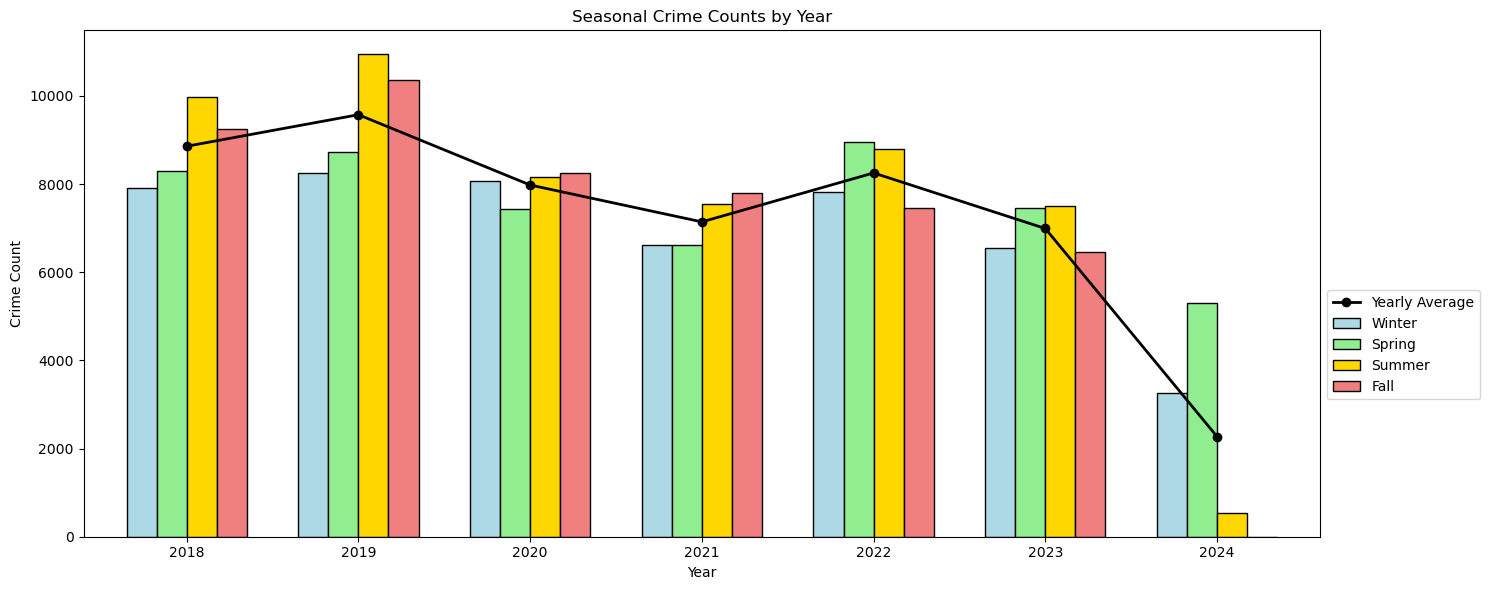

In [4]:
# group data by year, month
grouped_by_y_m_sum = df_crime_data.groupby(['year','month'])['crime_count'].sum().reset_index(name='total_crime_count')

def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return None  # In case of invalid month

# apply the function to create a new column 'season'
grouped_by_y_m_sum['season'] = grouped_by_y_m_sum['month'].apply(assign_season)

# color mapping 
seasons_colors = ['#ADD8E6','#90EE90','#FFD700','#F08080']

# pivot the dataframe into the correct shape
df_crime_data_bargraph = pd.pivot_table(data=grouped_by_y_m_sum, index=grouped_by_y_m_sum.year, columns='season', values='total_crime_count',aggfunc='sum')

# sort season
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
df_crime_data_bargraph = df_crime_data_bargraph[season_order]

# plot
ax = df_crime_data_bargraph.plot(kind='bar', figsize=(15, 6), ylabel='Crime Count', color=seasons_colors, xlabel='Year', rot=0, width=0.7, edgecolor='black')

grouped_by_year = df_crime_data.groupby('year')['crime_count'].sum().reset_index(name='yearly_avg_crime_count')
grouped_by_year['yearly_avg_crime_count_'] = grouped_by_year['yearly_avg_crime_count'] /4
ax.plot(grouped_by_year['yearly_avg_crime_count_'], color='black', marker='o', linewidth=2, label='Yearly Average')

ax.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.title('Seasonal Crime Counts by Year')
plt.tight_layout()
plt.show()

The chart above presents seasonal crime counts by year from 2018 to 2024, showing crime distribution across four seasons—Fall (yellow), Spring (green), Summer (red), and Winter (blue)—with a black line representing the yearly average crime count. The seasons were divided according to the time consideration provided by Canada's National Research Council (Canada, National Research Council, 2023).

From 2018 to 2023, the overall crime count shows a steady decline, with 2019 and 2020 showing higher crime levels, followed by a decrease in 2021, 2022, and 2023. This may suggest a downward trend in crime over recent years, possibly influenced by changing social dynamics, enforcement measures, or even the pandemic period. The black line (Yearly Average) shows a slight downward trend overall, reinforcing this decline across all seasons.

Summer (red bars) consistently has the highest crime count across all years except for the incomplete 2024 data. This suggests that warmer months tend to have higher crime activity, possibly due to increased outdoor activity, social gatherings, and potential conflicts.
Winter (blue bars), on the other hand, sees the lowest crime counts, which is likely influenced by colder weather, shorter days, and reduced outdoor activities. Spring (green) and Fall (yellow) tend to fall between Summer and Winter crime rates, suggesting moderate crime levels during transition seasons.

In conclusion, seasonality significantly influences crime patterns, with clear peaks in Summer and lows in Winter. Understanding these seasonal trends can help in crime prevention strategies, such as increasing law enforcement or community interventions during high-crime periods like Summer.

**Analysing Crime Count by Season and Crime Type**

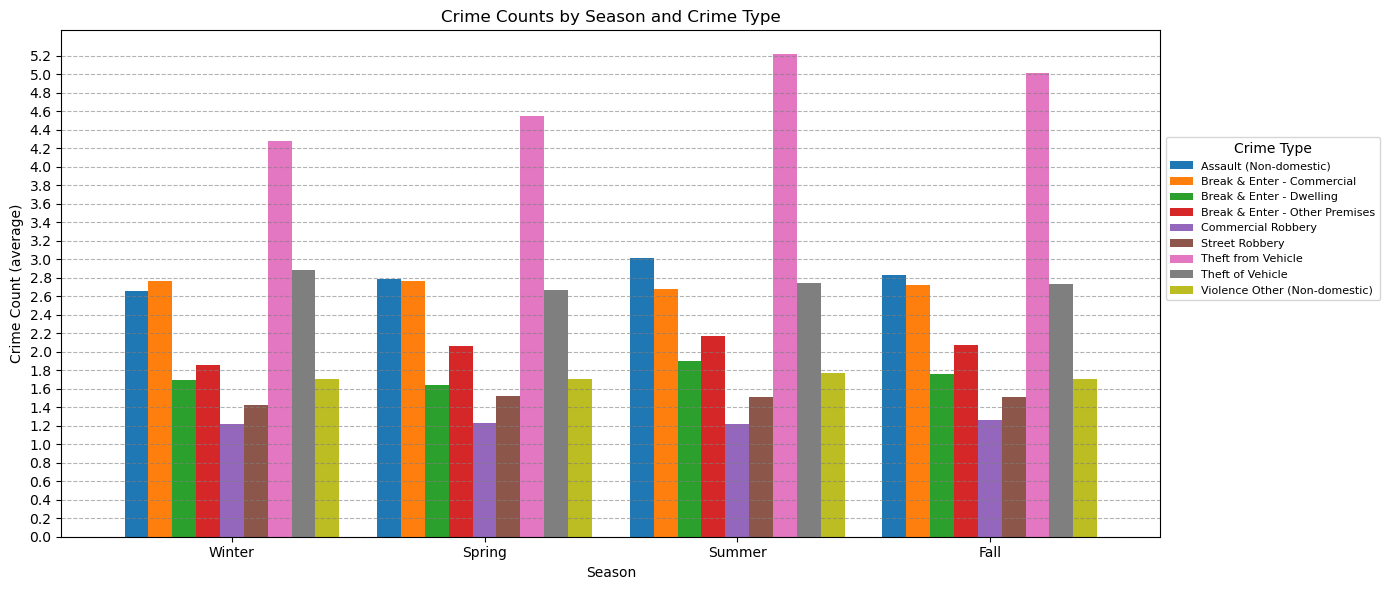

In [5]:
# Seasonality stack bar graph

# separate DF for seasonality stack bar graph
df_crime_data_seasonality = df_crime_data

# create a 'season' column based on the month
df_crime_data_seasonality['season'] = df_crime_data_seasonality['month'].map(assign_season)


# group the data by season and crime type, aggregating the crime_count
df_crime_data_seasonality_grouped = df_crime_data_seasonality.groupby(['season', 'category'], as_index=False).agg({
    'crime_count': 'mean'  # Only aggregate the 'count' column
})


# pivot the data to get crime types as columns, seasons as rows, and separate by community
season_crime_pivot = df_crime_data_seasonality_grouped.pivot_table(index=['season'], columns='category', values='crime_count', aggfunc='sum', fill_value=0)
#print(season_crime_pivot)


# season_order = ['Spring', 'Summer', 'Fall', 'Winter']
# season_crime_pivot = season_crime_pivot.reindex(season_order)
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_crime_pivot = season_crime_pivot.reindex(season_order)

# Create a clustered bar chart
ax = season_crime_pivot.plot(kind='bar', figsize=(14, 6), width=0.85)
plt.title('Crime Counts by Season and Crime Type')
plt.xlabel('Season')
plt.ylabel('Crime Count (average)')
plt.xticks(rotation=0)
plt.legend(title='Crime Type')
plt.legend(title='Crime Type', bbox_to_anchor=(1, 0.8), loc='upper left', fontsize='8')
yticks = np.arange(0, season_crime_pivot.values.max(), 0.2)
plt.yticks(yticks)

ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.6)
plt.tight_layout()
plt.show()

Overall trend, summer is the season with the highest number of crimes across various types.

In summer, Theft from Vehicle shows a significant number of incidents, suggesting that this crime may be more common in warmer weather when more people are outdoors and vehicles are easier to access. Assault (Non-domestic) and Break & Enter crimes also report higher counts in summer, reflecting increased social interactions and opportunities for these offenses.

Despite the overall summer peak, some crime categories have higher numbers in winter. For example, Break & Enter - Commercial crimes peak in winter, suggesting that businesses might be more vulnerable during this season, possibly due to holiday closures or less foot traffic. Theft of Vehicle also sees significant numbers in winter, indicating that this type of crime remains common regardless of the season, potentially influenced by factors like reduced visibility in bad weather. On the other hand, Street Robbery decreases in winter, which may reflect a deterrent effect of colder weather on outdoor activities.

This analysis highlights the complexity of crime patterns throughout the year. While summer generally has higher overall crime counts, certain categories like Break & Enter - Commercial and Theft of Vehicle need attention during the winter months.

### Guiding Question 3: How does the crime rate correlate with unemployment rates over time?
For this guiding question, we aim to explore the relationship between crime rates and unemployment over time to reveal how economic conditions influence criminal behavior. Increased unemployment can lead to higher crime rates as individuals may resort to unlawful activities due to financial hardship. This question is vital for informing policies that address economic factors linked to crime and for helping law enforcement develop targeted prevention strategies during times of economic downturn.

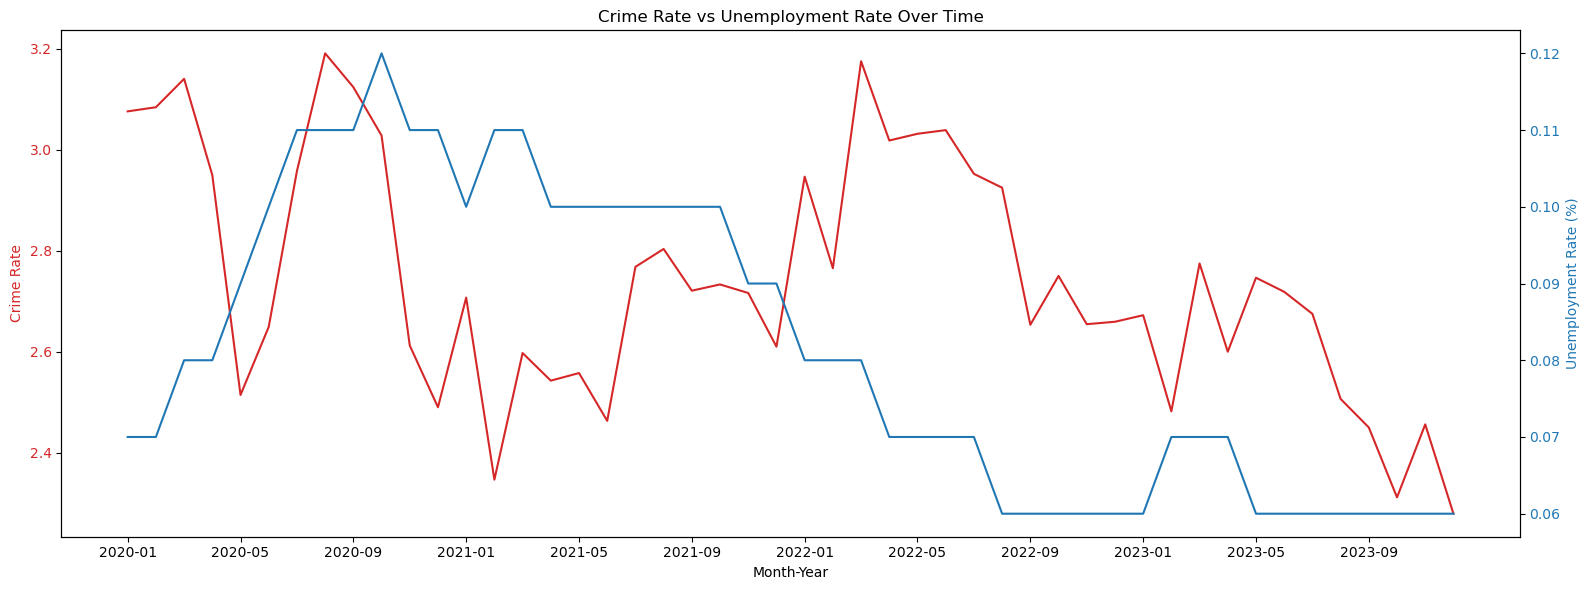

In [6]:
df_crime_data_q5 = df_crime_data
# Filter the DataFrame to include only records with >2020 year < 2024
df_crime_data_q5 = df_crime_data_q5[(df_crime_data_q5['year'] >= 2020) & (df_crime_data_q5['year'] <= 2023)].copy()

# Create the 'month_year' column
df_crime_data_q5['month_year'] = df_crime_data_q5['year'].astype(str) + '-' + df_crime_data_q5['month'].astype(str).str.zfill(2)
df_crime_data_q5_grp = df_crime_data_q5.groupby('month_year')['crime_count'].mean().reset_index()
df_crime_data_q5_grp = df_crime_data_q5_grp.rename(columns={'crime_count': 'avg_crime_count'})

df_unemployment_data_q5 = df_unemployment_data
df_unemployment_data_q5 = df_unemployment_data_q5.rename(columns={'date': 'month_year'})
#df_unemployment_data_q5['date'] = df_unemployment_data_q5['date'].str.strip()

# Merge datasets
merged_data = pd.merge(df_crime_data_q5_grp, df_unemployment_data_q5, on='month_year')

# Plot the dual-axis line plot
fig, ax1 = plt.subplots(figsize=(16, 6))

# Plotting the crime rate on the left Y-axis
ax1.set_xlabel('Month-Year')
ax1.set_ylabel('Crime Rate', color='tab:red')
ax1.plot(merged_data['month_year'], merged_data['avg_crime_count'], color='tab:red', label='Crime Rate')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create a second Y-axis for the unemployment rate
ax2 = ax1.twinx()
ax2.set_ylabel('Unemployment Rate (%)', color='tab:blue')
ax2.plot(merged_data['month_year'], merged_data['calgary_cer_unemployment_rate_(%)'], color='tab:blue', label='Unemployment Rate (%)')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Adjust x-axis
plt.xticks (fontsize=5)
plt.gca().set_xticks(plt.gca().get_xticks()[::4])

# Title and show the plot
plt.title('Crime Rate vs Unemployment Rate Over Time')
fig.tight_layout()
plt.show()

The line graph above illustrates the relationship between crime rates and unemployment rates on a monthly basis from January 2020 to December 2023. The red line represents the average crime rate, while the blue line tracks the unemployment rate over the same period. Both variables exhibit fluctuations, but a direct relationship is not immediately evident. The crime rate displays sharper peaks, with notable spikes in mid-2020 and early 2021, while the unemployment rate shows a more gradual and steady decline after mid-2020. Toward the end of the period, both metrics converge to their lowest points, particularly in 2023, suggesting a potential inverse trend between the two variables during this timeframe. 

To gain a clearer understanding of this relationship, further statistical analysis is recommended, such as conducting a correlation analysis to quantify their association. Additionally, considering a longer timeframe could provide insights into trends before and after the pandemic, enhancing the analysis of how these variables interact over time.

### Guiding Question 4: How did the Covid-19 pandemic affect crime rates?

The data we have is from the year 2018 to mid–2024 that is till June 2024. While researching more about crime in those years, it was analyzed that in between the stated years, the world went through the COVID-19 pandemic. We divided the graph into 3 sections, the first is before March 2020, the pre-period, between March 2020 to June 2022 is the time when COVID restrictions were being imposed and after June 2022, the post-covid period, all the mandatory COVID restrictions were lifted. However, the dates we considered are officially marked by either the Government of Alberta or The Alberta Health Ministry.

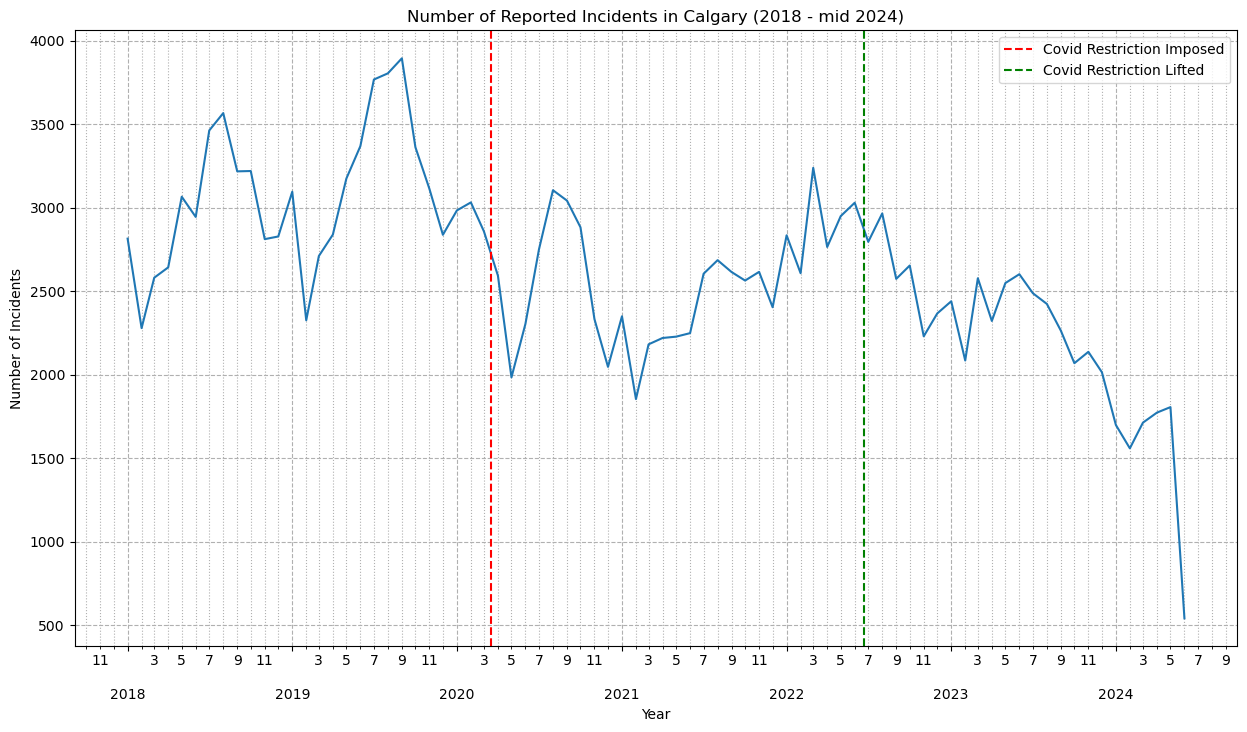

In [7]:
incidents_by_date = df_crime_data.groupby('date')['crime_count'].sum().reset_index()

# Sort by date
incidents_by_date = incidents_by_date.sort_values('date')
plt.figure(figsize=(15, 8))
plt.plot(incidents_by_date['date'], incidents_by_date['crime_count'])
plt.title('Number of Reported Incidents in Calgary (2018 - mid 2024)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')


# Format the x-axis labels to show both years and odd months
def custom_date_format(x, pos):
    date = mdates.num2date(x)

    # For major ticks (years), show the year
    if date.month == 1:
        return f'\n\n{date.year}'

    # For minor ticks (odd months), show the month
    elif date.month % 2 == 1:
        return f'{date.month}'

    return ''

# Format x-axis
ax = plt.gca()
# Major locator for years
ax.xaxis.set_major_locator(mdates.YearLocator())
# Minor locator for months
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=range(1, 13)))
# Apply the custom formatter to the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(custom_date_format))
ax.xaxis.set_minor_formatter(FuncFormatter(custom_date_format))

# Add gridlines
ax.grid(True, which='major', axis='both', linestyle='--')  # Major gridlines
ax.grid(True, which='minor', axis='x', linestyle=':')      # Minor gridlines (x-axis only)
plt.axvline(x=pd.Timestamp('2020-03-16'), color='red', linestyle='--', label='Covid Restriction Imposed')
plt.axvline(x=pd.Timestamp('2022-06-22'), color='green', linestyle='--', label='Covid Restriction Lifted')
plt.legend()
plt.show()

Analyzing the graph, it can be observed before the COVID or pre-covid period, the number of incidents were high and during the COVID restriction phase, initially the incidents tended to have a sharp drop, but they kept on experiencing an up-and-down scenario for the entire phase. In the end, when the post-covid phase started the incidents increased but overall compared with the past years, they were quite low in numbers and gradually kept on decreasing with every coming year.

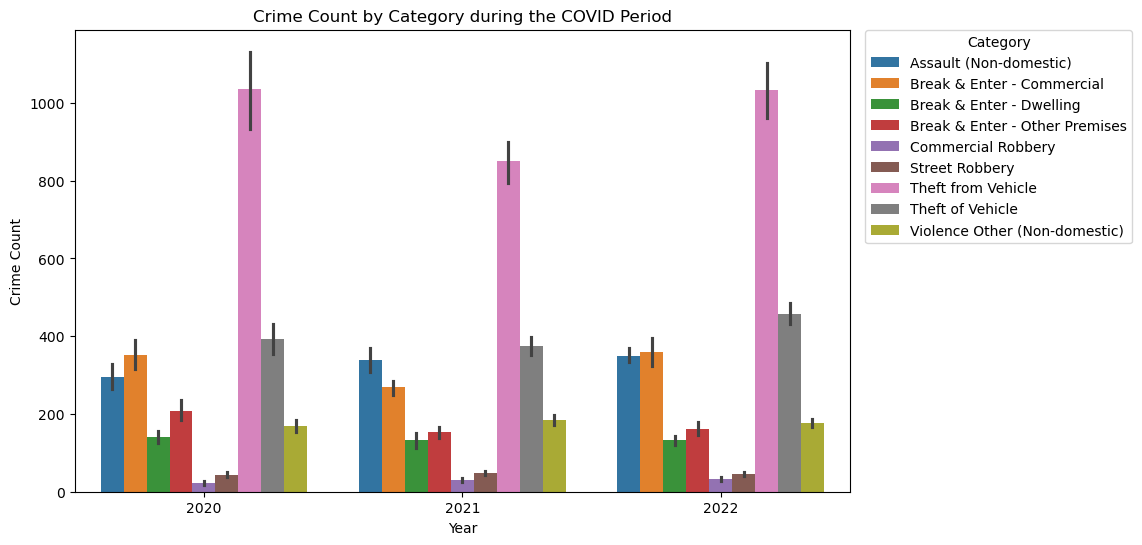

In [8]:
group_cat_year = df_crime_data.groupby(['month','year', 'category'])['crime_count'].sum().reset_index()

covid_data = group_cat_year[(group_cat_year.year >= 2020) & (group_cat_year.year <= 2022)]
# print(covid_data)

plt.figure(figsize=(10, 6))

sns.barplot(data=covid_data, x='year', y='crime_count', hue='category')

plt.title('Crime Count by Category during the COVID Period')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend(title='Category', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

Since we are discussing the COVID period, we extracted the data from 2020 to 2022 focusing on the restrictions implemented phase. From the stated range we created a graph showcasing the kind of crime that occurred during that time. In the visual representation, we can see that the highest number of crimes experienced were Theft from the vehicle which is stealing things from parked cars followed again by vehicle-related crimes that as Theft of Vehicle which meant stealing the entire vehicle. The least number of incidents that happened were related to commercial robbery; it may be because most of the stores were shut down during that period.

### Guiding Question 5: How are crime rates and crime types distributed across communities?

Calgary is divided into eight quadrants, which are further divided into over 200 communities. In this guiding question, we aim to use various visualizations to answer two main questions:

- How is the overall crime rate distributed across different quadrants and communities?
- What are the most common types of crime, and how are they distributed across different quadrants?







  

#### How are crime rates distributed across Calgary's Quadrants?

In total, there are eight quadrants in Calgary, including 
- City Centre
- East
- West 
- North
- North East
- North West
- South
- South East

(Note that there is no South West quadrant)


To study the crime distribution over these quadrants, we will plot the total crime count of each quadrant in a bar chart.

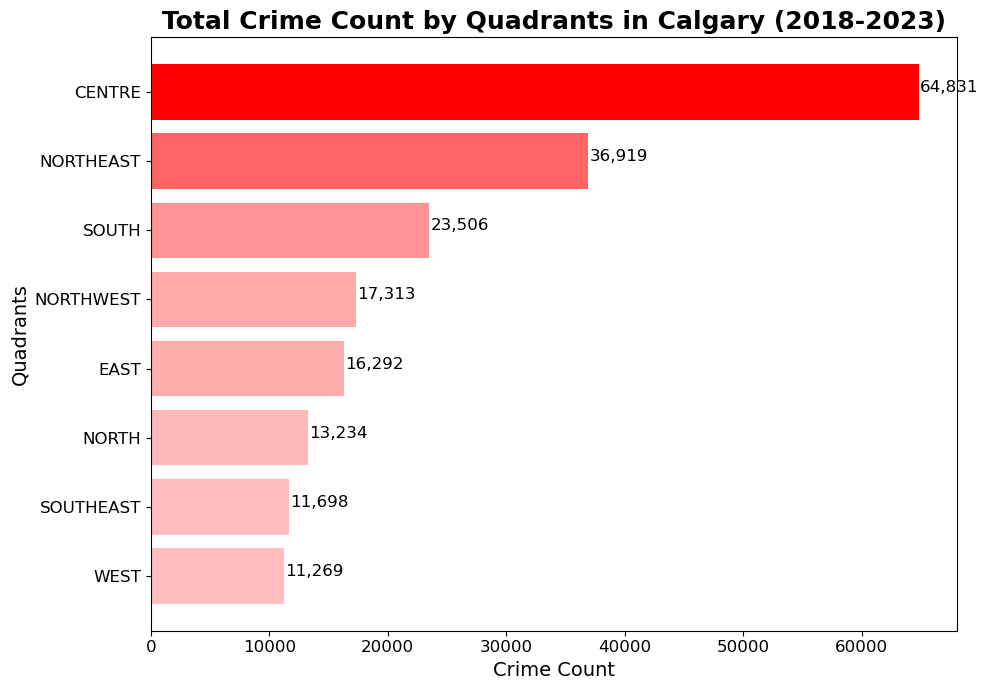

In [9]:
### Bar chart - Crime rate distribution

# Filter for year, 2018 to 2023
df_crime_data_filtered = df_crime_data[(df_crime_data['year'] >= 2018) & (df_crime_data['year'] <= 2023)]

# Merge crime and community datasets
merged_df = pd.merge(df_crime_data_filtered, df_community_districts[['NAME', 'SECTOR']], 
                     left_on='community', right_on='NAME', how='left')
# print(merged_df)

# Group by quadrant, find the crime count of each quadrant
sector_crime_count = merged_df.groupby('SECTOR')['crime_count'].sum().sort_values(ascending=True)
# print(sector_crime_count)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 7))
cmap = mcolors.LinearSegmentedColormap.from_list("custom_red", ['#FFE6E6', '#FF0000']) # Specify colormap, allow varying the color based on crime count
bars = ax.barh(sector_crime_count.index, sector_crime_count.values, 
               color=cmap(sector_crime_count / sector_crime_count.max()))

# Customize the chart
plt.title('Total Crime Count by Quadrants in Calgary (2018-2023)', fontsize=18, fontweight='bold')
plt.xlabel('Crime Count', fontsize=14)
plt.ylabel('Quadrants', fontsize=14)

# Add crime count to each bar, adjust x-axis lables
for i, v in enumerate(sector_crime_count):
    ax.text(v + 100, i, f'{int(v):,}', color='black', fontsize=12)

ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

**Key Takeaways - "How are crime rates distributed across Calgary's Quadrants"**
- The City Centre quadrant has the highest crime count, with 64,831 reported incidents from 2018 to 2023. This quadrant is a hotspot for crime, likely due to its high population density and high level of business activity.

- The North, Southeast, and West quadrants have the lowest crime counts, with the West quadrant being the safest, reporting only 11,269 crimes from 2018 to 2023.

#### How are crime rates distributed across Calgary's Community ?

There are over 200 communities in the city of Calgary; therefore, we will divide the analysis into two parts.
  - Part One: A choropleth is used to show the overall crime distribution across all communities.
  - Part Two: A bar chart is used to focus our analysis on the top 15 communities by crime count.

**Part One - Crime Distribution by Communities (Overall)**

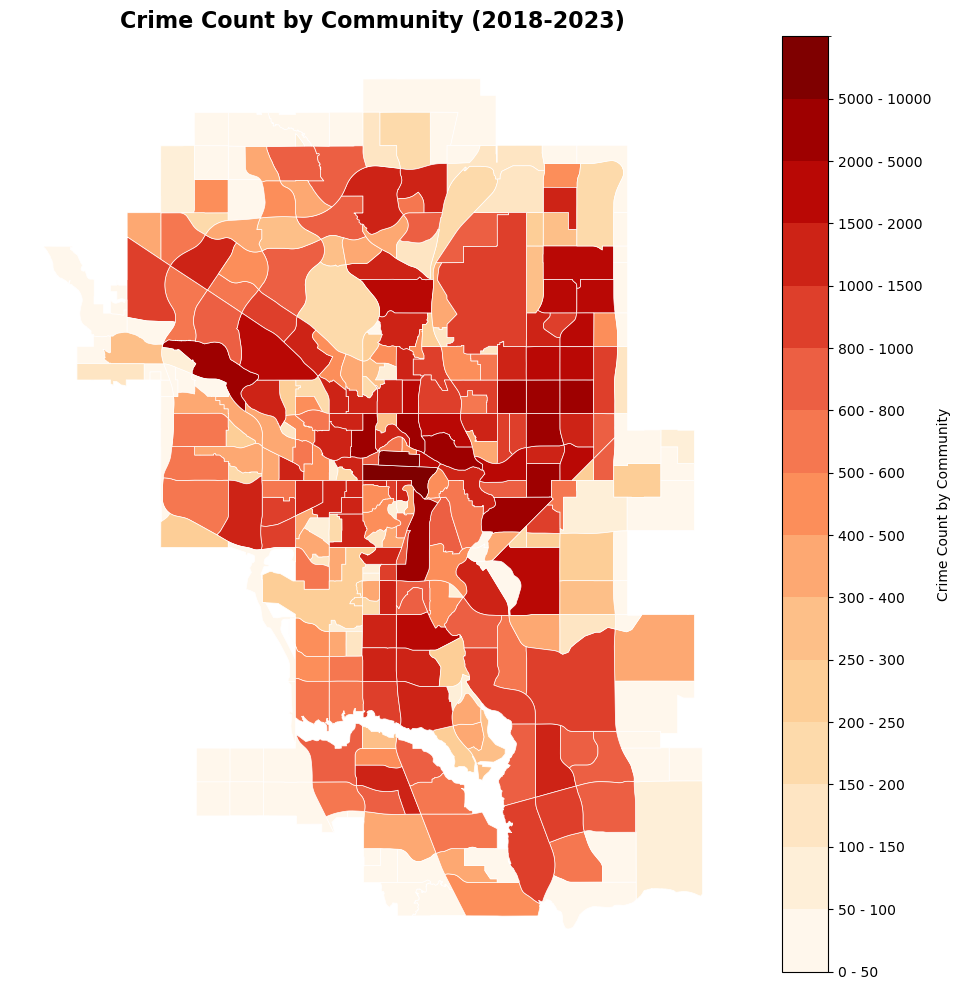

In [10]:
### Choropleth - Crime distribution by communities

# Convert MULTIPOLYGON to geometry object, instructs geopandas to use the EPSG:4326 coordinate system for the GeoDataFrame 
df_community_districts['geometry'] = df_community_districts['MULTIPOLYGON'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df_community_districts, geometry='geometry')
gdf.set_crs(epsg=4326, inplace=True)
# print(gdf)

# Normalize community name for better matching
df_crime_data['community_normalized'] = df_crime_data['community'].str.lower().str.strip()
gdf['NAME_normalized'] = gdf['NAME'].str.lower().str.strip()

# Filter year, 2018-2023 only, calculate the total crime count
df_crime_data['year'] = pd.to_datetime(df_crime_data['date']).dt.year
df_crime_data_filtered = df_crime_data[(df_crime_data['year'] >= 2018) & (df_crime_data['year'] <= 2023)]
# print(df_crime_data_filtered)
df_crime_data_grouped = df_crime_data_filtered.groupby('community_normalized')['crime_count'].sum().reset_index()
# print(df_crime_data_grouped)

# Merge two datasets by community name
gdf = gdf.merge(df_crime_data_grouped, how='left', left_on='NAME_normalized', right_on='community_normalized')
gdf['crime_count'] = gdf['crime_count'].fillna(0)
# print(gdf)

# Define bins based on crime count
bins = [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 800, 1000, 1500, 2000, 5000, 10000]
cmap = plt.get_cmap('OrRd')  # Orange-Red color
# Map bin to colors. cmap.N defines the no. of color availabel (usually 256)
norm = mcolors.BoundaryNorm(bins, cmap.N)

# Create map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoDataFrame without the automatic color legend (legend=False)
gdf.plot(ax=ax, column='crime_count', cmap=cmap, linewidth=0.5, edgecolor='white', norm=norm, legend=False)

# Create and customize the colorbar at the right
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Crime Count by Community')

# Set ticks and labels for the colorbar
cbar.set_ticks(bins[:-1])  # bins[:-1] to exclude the tick at the end (i.e. 10000), as there are no upper range can be defined
# Create labels for each range
colorbar_labels = []
for i in range(len(bins) - 1):
    label = f"{bins[i]} - {bins[i+1]}"
    colorbar_labels.append(label)

cbar.ax.set_yticklabels(colorbar_labels)

# Remove x axis
plt.title('Crime Count by Community (2018-2023)', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

**Key Takeaways - Part One: Crime Distribution by Communities (Overall)**

- The communities in central Calgary, particularly those in the downtown and nearby areas, show the highest crime counts. The reporting crime counts ranging from 2,000 to 10,000 crimes between 2018 and 2023.

- The outer communities, especially those in the south, northwest, and southeast, generally show lower crime counts. The reporting crime counts are usualy fewer than 800.


  
**Part Two: Crime Distribution by Communities (Top 15)**

We will now focus on analyzing the top 15 communities with the highest crime rates. The related data will be visualized using a bar chart.

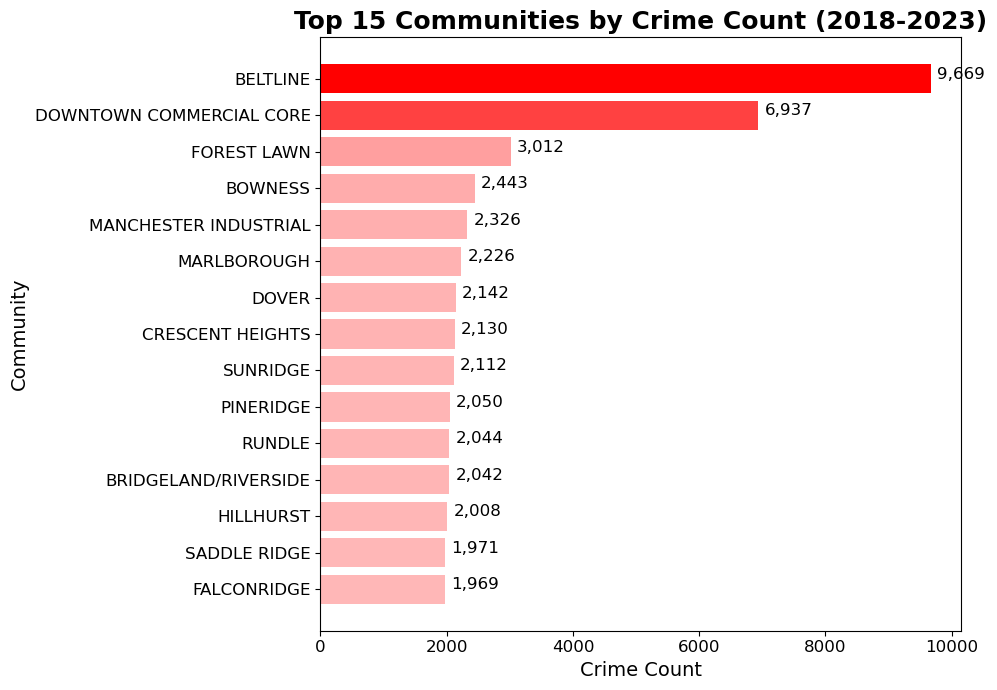

In [11]:
### Bar chart - Crime distribution by communities (Top 15)

# Filter data for the years 2018 to 2023, cal. total crime count by communitiy
df_crime_data_filtered = df_crime_data[(df_crime_data['year'] >= 2018) & (df_crime_data['year'] <= 2023)]
community_crime_count = df_crime_data_filtered.groupby('community')['crime_count'].sum().sort_values(ascending=False)
# print(community_crime_count)

# Select top 15 communities, sort ascending for better visualization
top_communities = community_crime_count.head(15).sort_values(ascending=True)
# print(top_communities)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 7))
cmap = mcolors.LinearSegmentedColormap.from_list("custom_red", ['#FFE6E6', '#FF0000'])  # Specify colormap
bars = ax.barh(top_communities.index, top_communities.values, 
               color=cmap(top_communities / top_communities.max()))  # Normalize color mapping

# Customize the chart
plt.title('Top 15 Communities by Crime Count (2018-2023)', fontsize=18, fontweight='bold')
plt.xlabel('Crime Count', fontsize=14)
plt.ylabel('Community', fontsize=14)

# Add crime count to each bar, also format the crime count with comma
for i, v in enumerate(top_communities):
    ax.text(v + 100, i, f'{int(v):,}', color='black', fontsize=12) # v+100 specifys x label position

# Customize layout
ax.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()

**Key Takeaways - Part Two: Crime Distribution by Communities (Top 15 communities)**

- Beltline is the community with the highest crime count, reporting 9,669 crimes between 2018 and 2023. This count is significantly higher than that of any other community.

- The Downtown Commercial Core ranked second, reporting 6,937 crimes, making it another hotspot for crime.

- The remaining communities show significantly lower crime levels.


#### What are the most common types of crime?

Before going into the quadrant level, we first need to understand the overall distribution of crime types at the city level. This information can be represented using a pie chart.

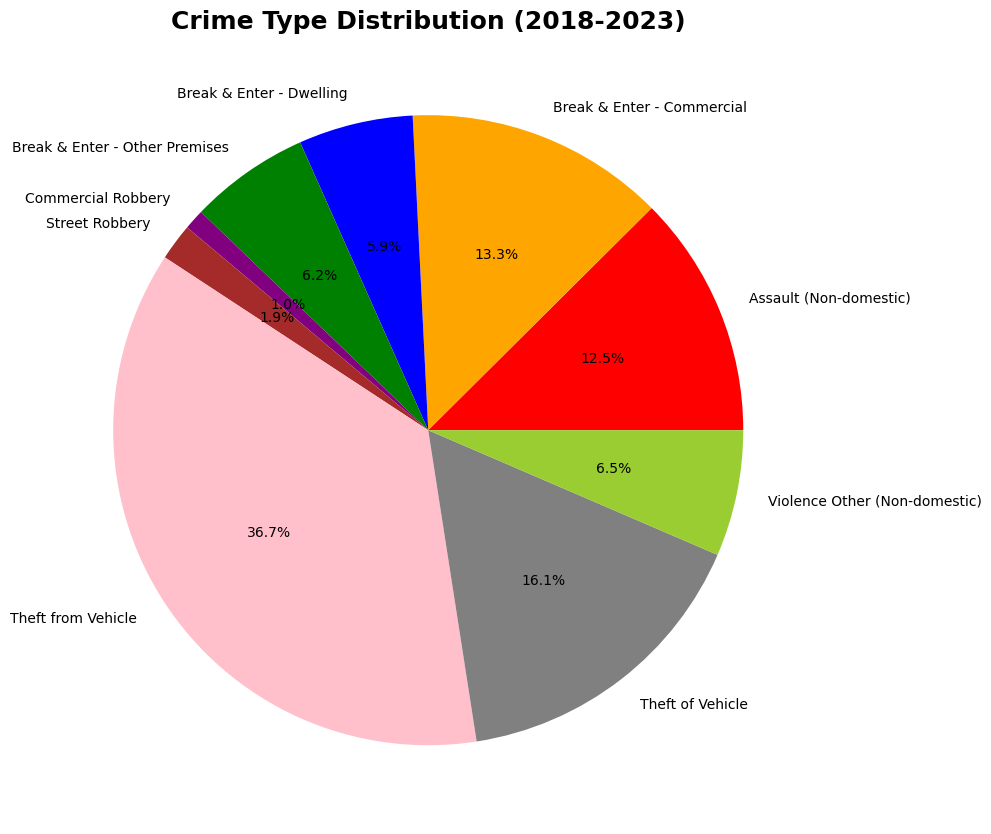

In [12]:
### Pie chart - Crime type distribution

# Filter data, 2018 to 2023 only, cal. total crime count by types
merged_df_filtered = merged_df[(merged_df['year'] >= 2018) & (merged_df['year'] <= 2023)]
crime_category_total = merged_df_filtered.groupby('category')['crime_count'].sum()
# print(crime_category_total)

# Custom color for each types of crime
custom_colors = [
    'red',
    'orange',
    'blue',
    'green',
    'purple',
    'brown',
    'pink',
    'gray',
    'yellowgreen',
    'cyan'
]

# Plot the pie chart, add % label
plt.figure(figsize=(10, 10))
plt.pie(crime_category_total, labels=crime_category_total.index, autopct='%1.1f%%', colors=custom_colors)

plt.title('Crime Type Distribution (2018-2023)', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

**Key-takeaways - Overall distribution of crime types**

- Theft from a Vehicle is the most common crime type, representing 36.7% of the total crimes. When combined with Theft of a Vehicle (16.1%), vehicle-related crimes represent over 50% of the total crimes committed.
- Break & Enter - Commercial and Assault (Non-domestic) ranked third and fourth, representing over 25% of total crimes.


#### How are different types of crimes distributed across Calgary's Quadrants ?

**Distribution of crime types by quadrants**

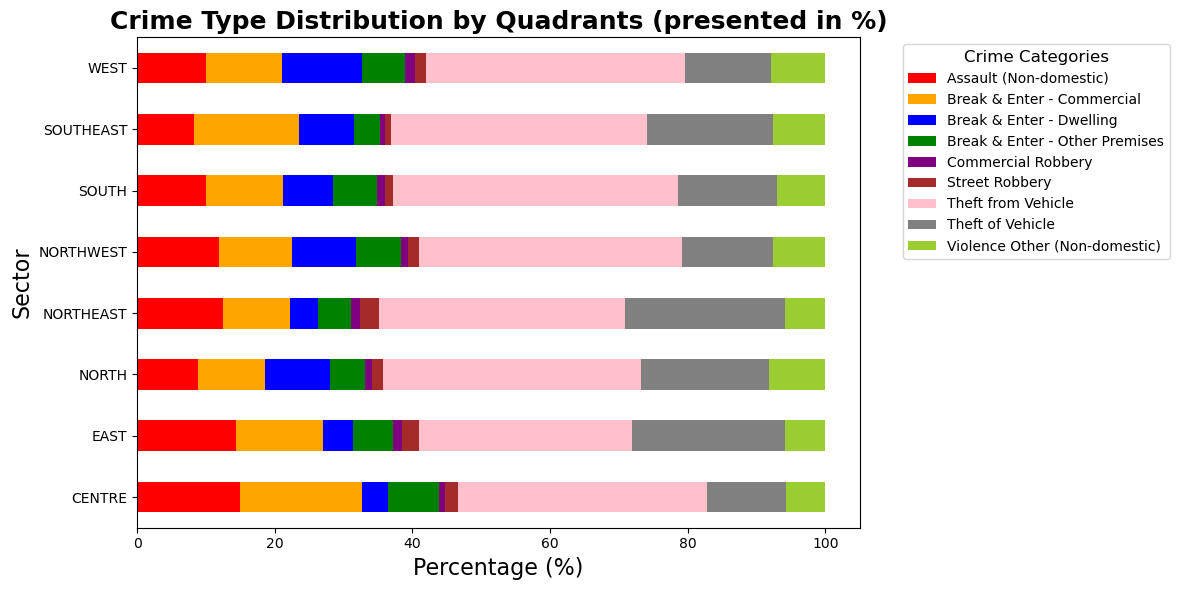

In [13]:
### % Stacked Bar Chart - Distribution of crime types by quadrants

# Filter data, 2018 to 2023 only, cal. total crime count by quadrants
merged_df_filtered = merged_df[(merged_df['year'] >= 2018) & (merged_df['year'] <= 2023)]
sector_category_crime = merged_df_filtered.groupby(['SECTOR', 'category'])['crime_count'].sum().unstack()
# print(sector_category_crime)

# Find the % of each crime type in each quadrant
# Cal. total crime count for each quadrant
sector_totals = sector_category_crime.sum(axis=1)
# Divide category crime count by quadrant crim count, multiply by 100 to get percentages
sector_category_percent = (sector_category_crime.div(sector_totals, axis=0)) * 100

# Custom color
custom_colors = [
    'red',
    'orange',
    'blue',
    'green',
    'purple',
    'brown',
    'pink',
    'gray',
    'yellowgreen',
    'cyan'
]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
sector_category_percent.plot(kind='barh', stacked=True, color=custom_colors, ax=ax)

plt.title('Crime Type Distribution by Quadrants (presented in %)', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=16)
plt.ylabel('Sector', fontsize=16)

# bbox_to_anchor=(1.05, 1), 1.05 - outside the chart, 1 - at the top of the chart
plt.legend(title='Crime Categories', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Key Takeaways - Distribution of Crime Type by Quadrants**

- Theft from a Vehicle is the dominant crime type in all quadrants, consistently representing the largest portion of crime in each quadrant.

- Theft of a Vehicle is the second most dominant crime type, with a significant representation in the Northeast and East quadrants.

- Commercial Robbery and Street Robbery are the least frequent crime types, representing a very small percentage across all quadrants.


# Discussion and Conclusion
In the project, we aimed to examine overall trends, any variations in the rate due to seasonality, the effect of COVID-19, social problems like unemployment, and also the distribution of crime across communities. We utilized datasets from The City of Calgary website, performed exploratory data analysis (EDA), and created various visualizations to represent our findings. Our primary goal was to uncover potential correlations between crime rates and various social, environmental, and economic factors.

Key findings from our analysis include:

**Overall Crime Rate Trends:**

- We observed that Calgary's crime rate has fluctuated over the years, showing both increases and decreases. However, the overall trend indicates a decrease in crime rates.

**Seasonal Patterns:**

- Our analysis revealed distinct seasonal patterns in crime rates, with clear peaks in Summer and lows in Winter. Interestingly, despite the overall summer peak, some crime categories have higher numbers in winter. For example, Break & Enter - Commercial crimes peak in winter, suggesting that businesses might be more vulnerable during this season, possibly due to holiday closures or less foot traffic.

**Unemployment and Crime Correlation:**

- Surprisingly, we could not find a clear correlation between unemployment and crime rates in Calgary. There is even a slight evidence of an inverse relationship between them. This might suggest that crime rates are influenced by multiple factors or a longer time-series analysis is required to deeper our understanding in this aspect.


**Impact of COVID-19:**

- We observed that the crime rate tended to have a sharp drop during the initial COVID restriction period, but they then kept on experiencing an up-and-down scenario for the entire phase. The overall crime rate of post-COVID is lower than the pre-COVID period, but we cannot conclusively attribute this decrease to the pandemic.

**Crime Rate and Types Distribution across Communities:**

- Our study shows significant variations in crime rates across Calgary's communities. The City Centre quadrant has the highest crime count, while the North, Southeast, and West quadrants are the safest areas with the lowest crime counts. Similar patterns were observed at the community level, with areas in or near the City Centre experiencing the highest crime rates. For the crime type analysis, vehical related crime, including the theft from a Vehicle and theft of a vehicle is the dominant crime type in all quadrants.

Through this project, we have gained valuable insights into the complex nature of crime in Calgary. We've learned that crime rates are influenced by multiple factors including economic conditions, seasonal changes, major societal events like the COVID-19 pandemic, and community-specific characteristics.

We have learned a lot in this project, and we would like to thank you for the feedback from our instructor and classmates throughout the project execution. This experience has been invaluable to all of us.

## References

1. Community Crime Statistics | Open Calgary. (2024, September 16). City of Calgary’s Open Data Portal. Retrieved September 20, 2024, from 
  https://data.calgary.ca/Health-and-Safety/Community-Crime-Statistics/78gh-n26t

2. Community District Boundaries | Open Calgary. (2024, September 16). City of Calgary’s Open Data Portal. Retrieved September 20, 2024, from https://data.calgary.ca/Base-Maps/Community-District-Boundaries/surr-xmvs/about_data

3. Unemployment rates | Open Calgary. (2024, September 16). City of Calgary’s Open Data Portal. Retrieved October 17, 2024, from   
 https://data.calgary.ca/Business-and-Economic-Activity/Unemployment-rates/wzpt-744u

4. Open Calgary Terms of use. (2024). Open Calgary. Retrieved October 17, 2024,  
https://data.calgary.ca/stories/s/u45n-7awa

5. When do the seasons start? | Government of Canada (2023) Retrieved October 17, 2024,  
https://nrc.canada.ca/en/certifications-evaluations-standards/canadas-official-time/3-when-do-seasons-start